# Example of predictions for one composition

**This notebook illustrates how we can get predictions for a composition of interest in a Jupyter Notebook setting.**

The first step is to load the libraries of interest:

In [1]:
#
# Library loading and additional function definition
#
%matplotlib inline #matplotlib magic


import numpy as np # for arrays
import matplotlib.pyplot as plt # for plotting
import imelt # the imelt library

The `imelt` library provides directly a function to load the trained model:

In [2]:
imelt_model = imelt.load_pretrained_bagged() # load the pre-trained 10 best models

Now we defined a composition of interest. We indicate the mol fractions of SiO2, Al2O3, Na2O and K2O:

In [3]:
composition = np.array([0.65, 0.10, 0.20, 0.05]).reshape(1,-1)

We can then get predictions of the glass Tg, density, fragility, or optical refractive index at 589 nm:

In [13]:
tg = imelt_model.predict("tg", composition) # glass transition temperature
density = imelt_model.predict("density", composition) # glass density
fragility = imelt_model.predict("fragility", composition) # glass density
ri = imelt_model.predict("sellmeier", composition, [589.0]) # glass refractive index at 589 nm

Predictions contain the outputs of the 10 best models. To get a single value, we can take the mean() and print it:

In [14]:
print('Glass transition temperature = {:.0f} K'.format(tg.mean(axis=1)[0]))
print('Glass density = {:.3f} g cm-3'.format(density.mean(axis=1)[0]))
print('Fragility = {:.1f}'.format(fragility.mean(axis=1)[0]))
print('Refractive Index at 598 nm = {:.3f}'.format(ri.mean(axis=1)[0]))

Glass transition temperature = 790 K
Glass density = 2.462 g cm-3
Fragility = 32.1
Refractive Index at 598 nm = 1.805


## Viscosity prediction

Now we can get prediction for the viscosity. We first select a temperature range and generate a temperature interval using the `numpy.arange()` function:

In [6]:
T_start = 600 # MODIFY THIS, lower T limit
T_stop = 1500 # MODIFY THIS, upper T limit
T_range = np.arange(T_start, T_stop, 1.0)

For the prediction, we can select different equations:

- ag > Adam-Gibbs
- am > Avramov Milchev
- myega > MYEGA
- tvf > VFT equation
- cg > Free Volume

Here we will choose the Adam-Gibbs one:

Text(0, 0.5, 'Viscosity, log Pa s')

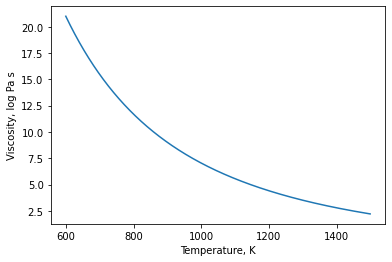

In [7]:
equation = "ag"

# The prediction happens here
viscosity = imelt_model.predict(equation,composition*np.ones((len(T_range),4)),T_range.reshape(-1,1))

# and we make a nice plot

plt.figure()
plt.plot(T_range, viscosity.mean(axis=1)) # we need to average the values outputed from the 10 best networks
plt.xlabel("Temperature, K")
plt.ylabel("Viscosity, log Pa s")

One can access the individual parameters of an equation directly by calling their name (see the `imelt.model()` class for a list). Here, we can print the values of Ae, Be and Sconf(Tg) for the Adam-Gibbs equation:


In [8]:
print("Ae = {:0.2f}".format(imelt_model.predict("ae", composition).mean()))
print("Be = {:0.1f}".format(imelt_model.predict("be", composition).mean()))
print("Sconf(Tg) = {:0.1f}".format(imelt_model.predict("sctg", composition).mean()))

Ae = -1.78
Be = 84767.7
Sconf(Tg) = 7.8


We can do the same for other equations, like the VFT one A + B/(T-C):

In [9]:
print("A = {:0.2f}".format(imelt_model.predict("a_tvf", composition).mean()))
print("B = {:0.1f}".format(imelt_model.predict("b_tvf", composition).mean()))
print("C = {:0.1f}".format(imelt_model.predict("c_tvf", composition).mean()))

A = -4.32
B = 7158.7
C = 351.7


## Raman spectrum prediction

Now we want to predict the Raman spectrum for our composition of interest. This is simply done with this line of code:

In [11]:
raman = imelt_model.predict("raman_pred", np.array(composition).reshape(1,-1))

We can now make a plot of the spectrum:

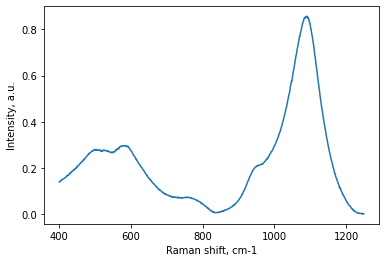

In [12]:
# Plotting the Raman spectra
x_raman_shift = np.arange(400.,1250.,1.0)
plt.figure()
plt.plot(x_raman_shift,raman.mean(axis=2).ravel())
plt.xlabel("Raman shift, cm-1")
plt.ylabel("Intensity, a.u.")
plt.show()